# Exploratory Data Analysis

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
# 결측치 확인
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 수치 데이터(숫자형)에 대한 요약
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# 가장 마지막에 있는 Outcome 은 label 값이기 때문에 제외하고 
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
# feature_columns 라는 변수에 담아줍니다.

feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화

값을 요약해 보면 최솟값이 0으로 나오는 값들이 있습니다.

0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것입니다.

따라서 0인 값을 결측치로 처리하고 시각화 해봅니다

In [9]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
# 결측치 여부를 나타내는 데이터프레임을 만듭니다.
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해 
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담습니다.
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [11]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

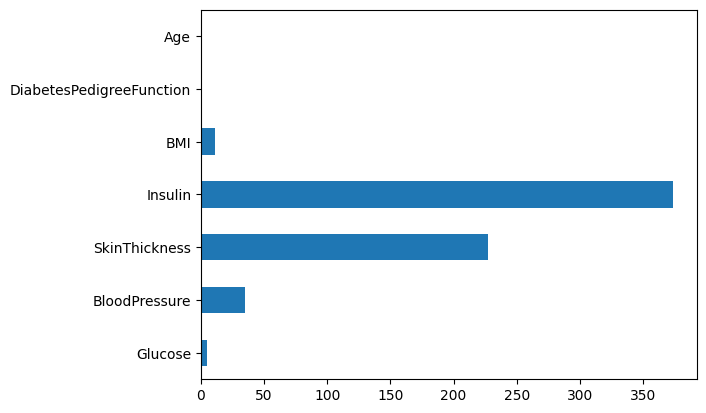

In [12]:
# 결측치의 갯수를 구해 막대 그래프로 시각화 합니다.
df_null.sum().plot.barh()

<Axes: >

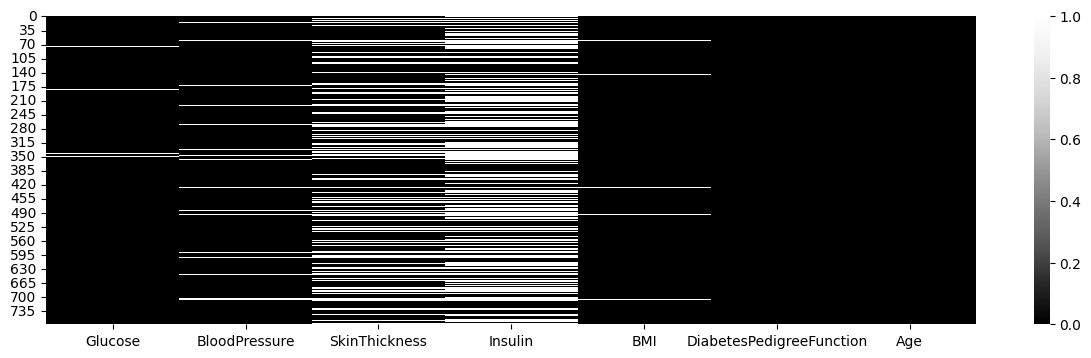

In [13]:
# 결측치를 heatmap 으로 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

## 정답값 (target or label)

In [14]:
# 정답값인 Outcome 의 갯수를 봅니다.
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
# 정답값인 Outcome 의 비율을 봅니다.
df["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [16]:
# 다른 변수와 함께 봅니다.
# 임신횟수와 정답값을 비교해 봅니다.
# "Pregnancies"를 groupby 로 그룹화 해서 Outcome 에 대한 비율을 구합니다.
# 결과를 df_po라는 변수에 저장합니다.

df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

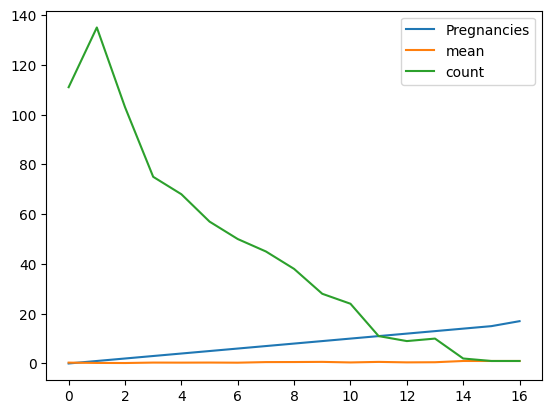

In [17]:
df_po.plot()

<Axes: >

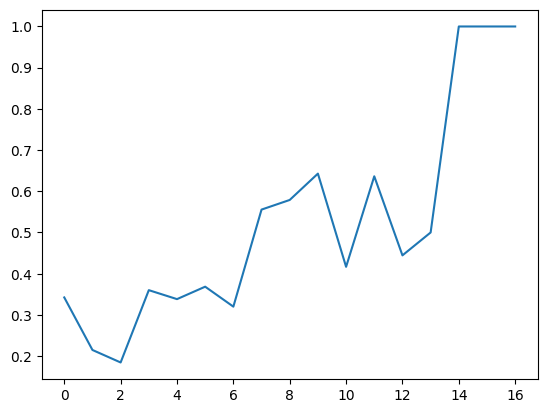

In [18]:
df_po["mean"].plot()

In [19]:
df.groupby(["Pregnancies"])["Outcome"].apply(lambda x: x)

Pregnancies     
0            4      1
             16     1
             45     1
             57     0
             58     0
                   ..
13           744    0
14           298    1
             455    1
15           88     1
17           159    1
Name: Outcome, Length: 768, dtype: int64

In [20]:
df.groupby(["Pregnancies"])["Outcome"].apply(lambda x: x)[13].value_counts()

Outcome
0    5
1    5
Name: count, dtype: int64

<Axes: >

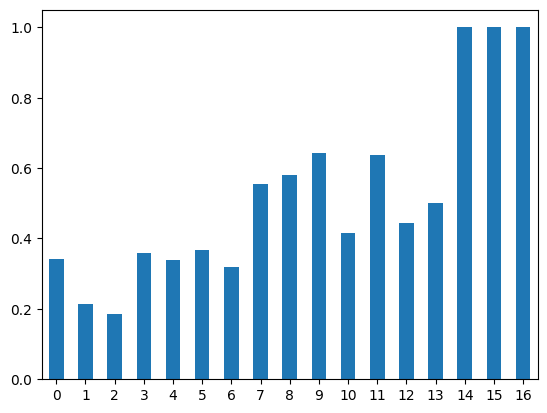

In [21]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po["mean"].plot.bar(rot=0)

## countplot

<Axes: xlabel='Outcome', ylabel='count'>

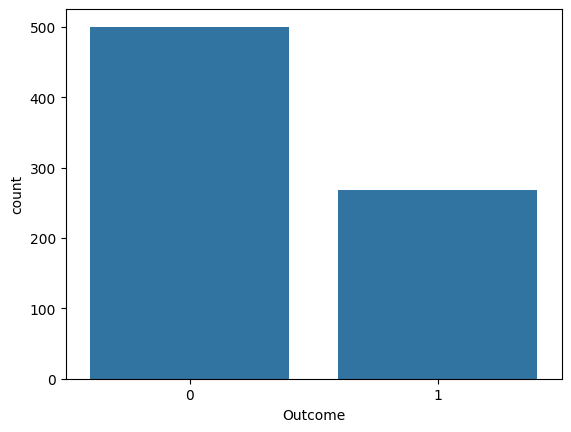

In [22]:
# 위에서 구했던 당뇨병 발병 비율을 구해봅니다.
# 당뇨병 발병 빈도수를 비교 합니다.

sns.countplot(data=df, x="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

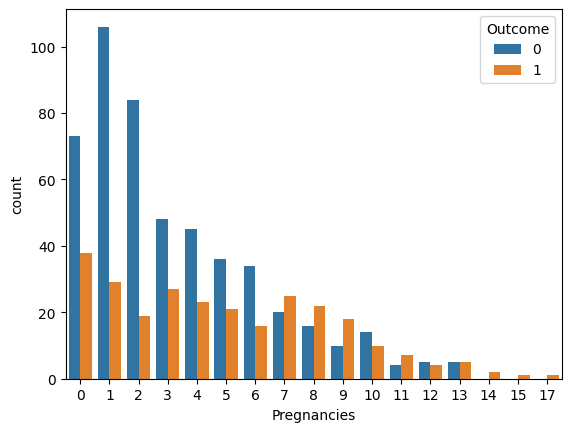

In [23]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교합니다.

sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [24]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듭니다.

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

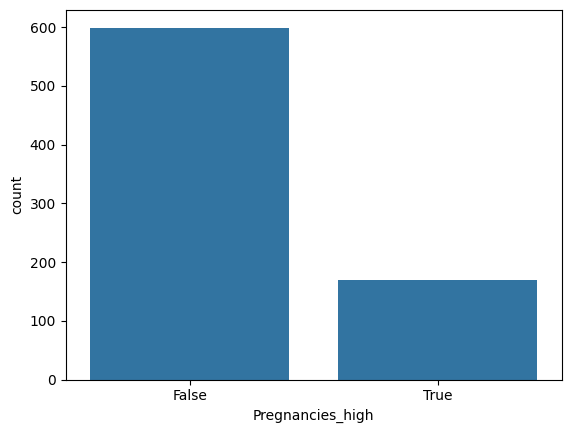

In [25]:
# 2개의 카테고리(범주)로 나뉜 임신횟수를 카운트해봅니다. 임신횟수가 적은 사람의 수가 더 많습니다.
sns.countplot(data=df, x="Pregnancies_high")

<Axes: xlabel='Pregnancies_high', ylabel='count'>

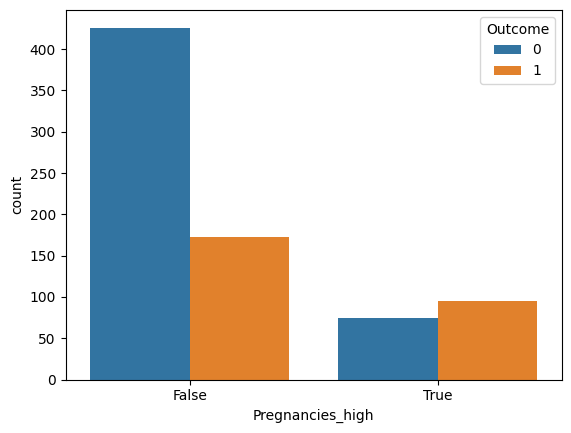

In [26]:
# Pregnancies_high 변수의 빈도수를 countplot 으로 그리고 
# Outcome 값에 따라 다른 색상으로 표현합니다.

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

# 임신횟수가 적은 그룹에서는 발병 횟수가 더 낮고, 임신횟수가 높은 그룹에서는 발병한 횟수가 발병하지 않은 횟수보다 더 높습니다.

## barplot

<Axes: xlabel='Outcome', ylabel='BMI'>

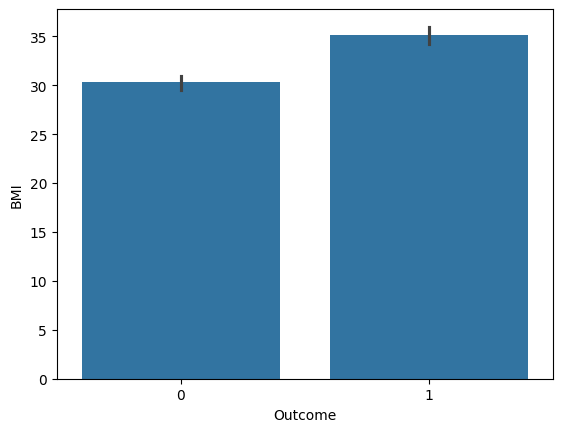

In [27]:
# 당뇨병 발병에 따른 BMI 수치를 비교합니다.

sns.barplot(data=df, x="Outcome", y="BMI")

<Axes: xlabel='Outcome', ylabel='Glucose'>

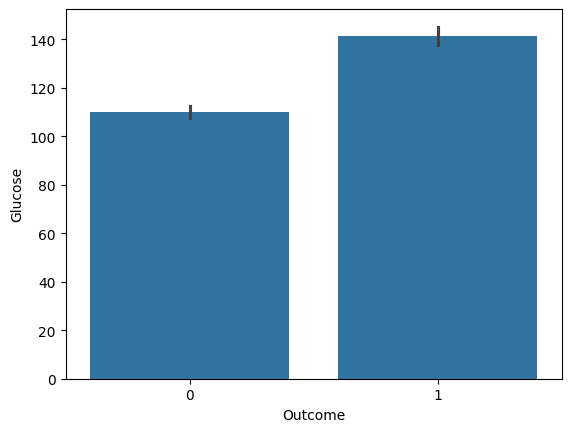

In [28]:
# 당뇨병 발병에 따른 포도당(Glucose)수치를 비교합니다.

sns.barplot(data=df, x="Outcome", y="Glucose")

<Axes: xlabel='Outcome', ylabel='Insulin'>

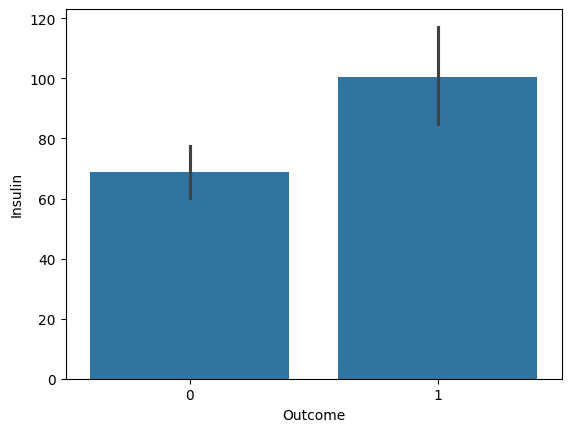

In [29]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교합니다.

"""
y축은 평균값을 표시하고 있습니다.
그래프 위에 세로로 그려진 까만 선은 데이터 일부를 샘플링하여 95%의 신뢰구간을 나타내는데
신뢰구간의 차이가 크다고 볼 수 있습니다.
"""

sns.barplot(data=df, x="Outcome", y="Insulin")

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

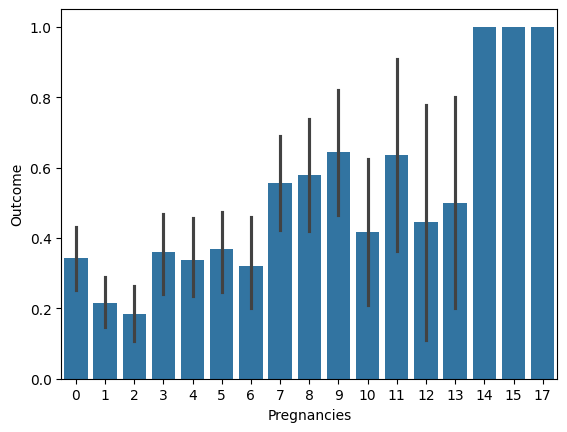

In [30]:
# 임신횟수에 대해서 당뇨병 발병 비율을 비교합니다.

sns.barplot(data=df, x="Pregnancies", y="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

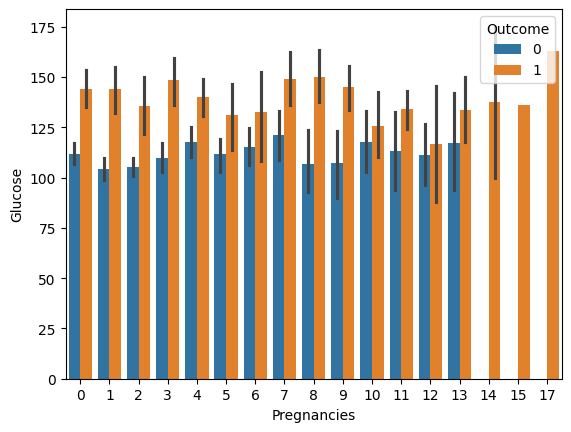

In [31]:
# 임신횟수(Pregnancies)에 따른 포도당(Glucose)수치를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.

sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='BMI'>

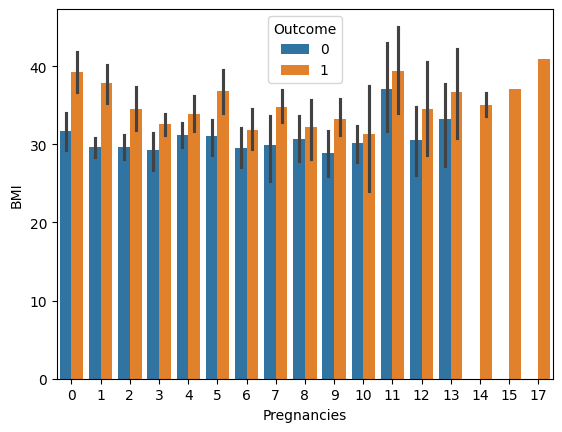

In [32]:
# 임신횟수(Pregnancies)에 따른 체질량지수(BMI)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.

sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

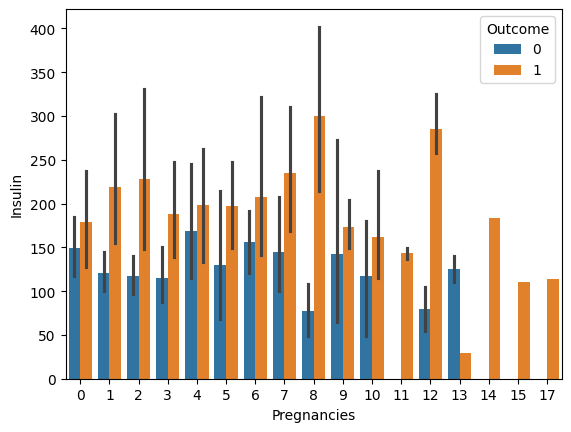

In [33]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.

sns.barplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome")

## boxplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

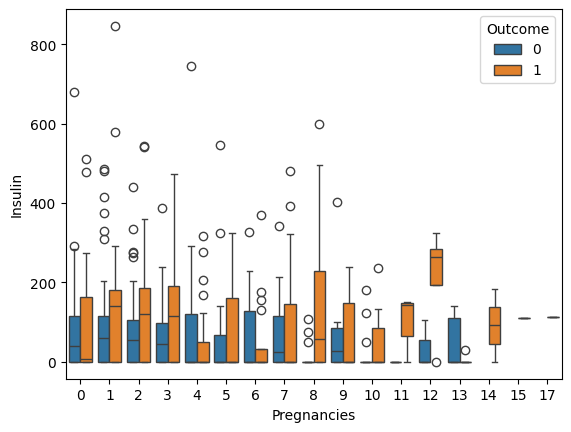

In [34]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.

sns.boxplot(data=df,
            x="Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

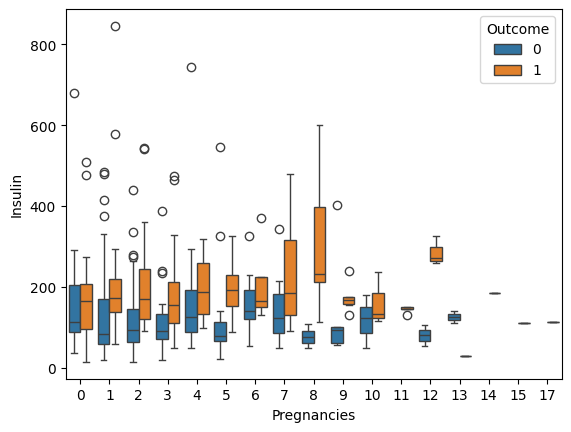

In [35]:
sns.boxplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome")

## violinplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

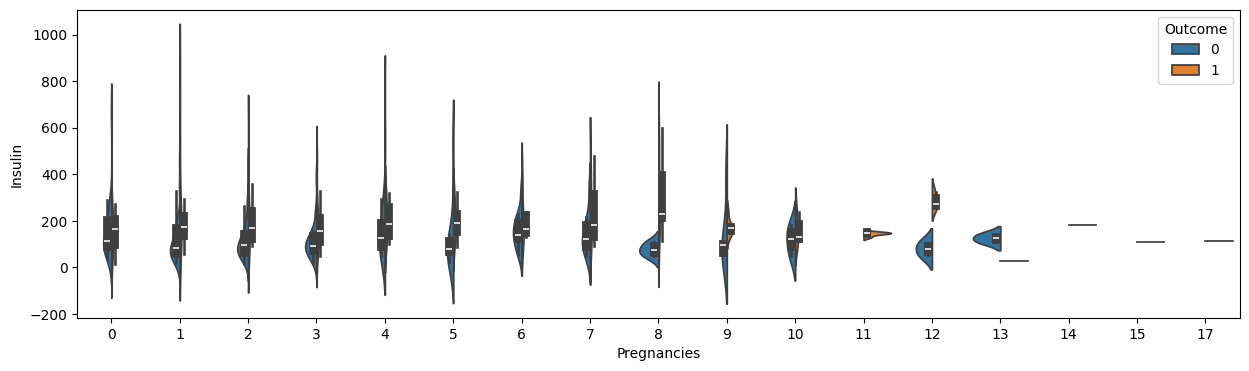

In [36]:
# 위의 그래프를 violinplot 으로 시각화 합니다.

plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome", split=True)

## swarmplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

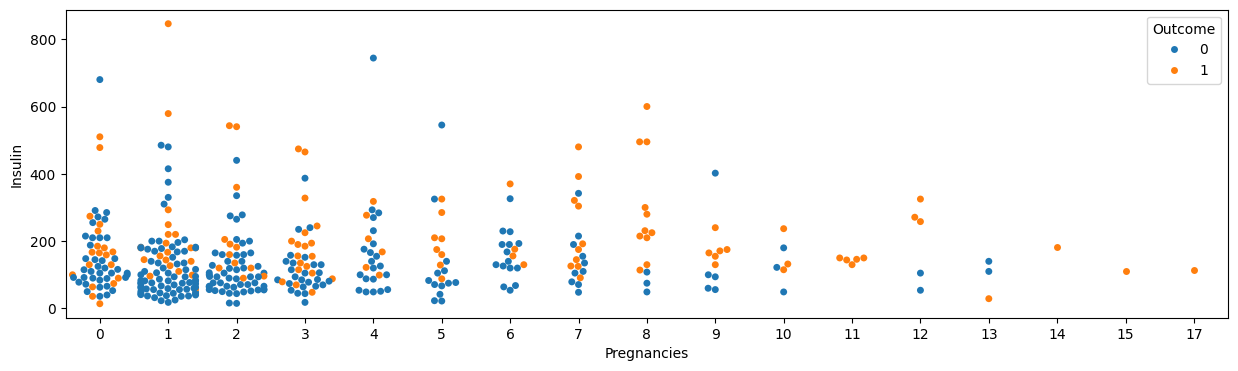

In [37]:
# 위의 그래프를 swarmplot 으로 시각화 합니다.

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0], 
            x="Pregnancies", y="Insulin", hue="Outcome")

## distplot

 displot은 1개의 수치형 변수를 표현할 때 사용하는 시각화 그래프입니다.

countplot은 카테고리형 데이터를 시각화할 때 사용합니다.

distplot은 다른 그래프와 달리 data 옵션 없이 바로 Series 데이터를 넣어줍니다.

In [38]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

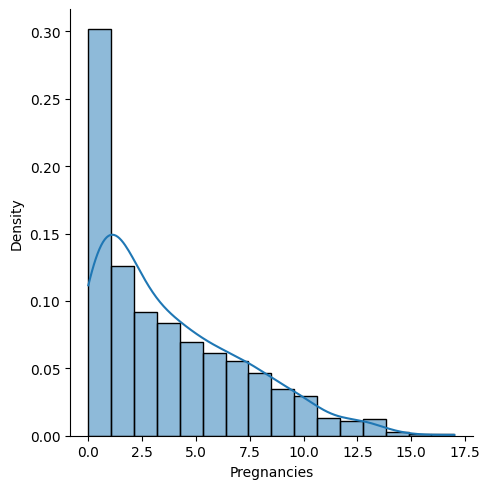

In [39]:
# 임신횟수를 시각화

# < seaborn 0.11
# sns.displot(df["Pregnancies"])

# >= seaborn 0.11
sns.displot(data=df, x="Pregnancies", kde=True, stat='density')

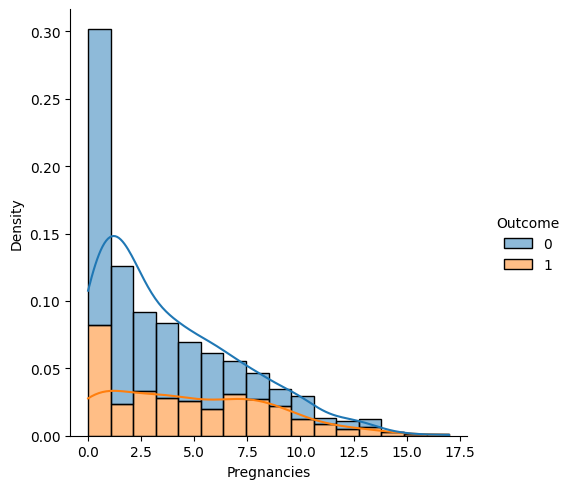

In [40]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화 합니다.

sns.displot(data=df, x="Pregnancies", hue="Outcome", multiple="stack", kde=True, stat='density')

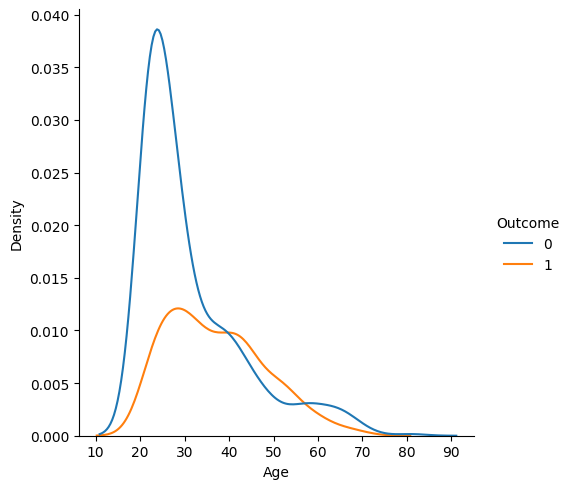

In [41]:
# 나이에 따른 당뇨병 발병 여부를 시각화 합니다.

sns.displot(data=df, x="Age", hue="Outcome", kind="kde")

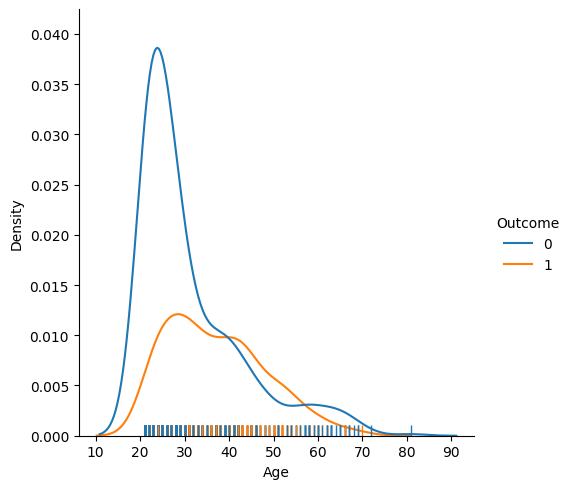

In [42]:
sns.displot(data=df, x="Age", hue="Outcome", kind="kde", rug=True)

## Subplots

### Pandas를 통한 histplot 그리기

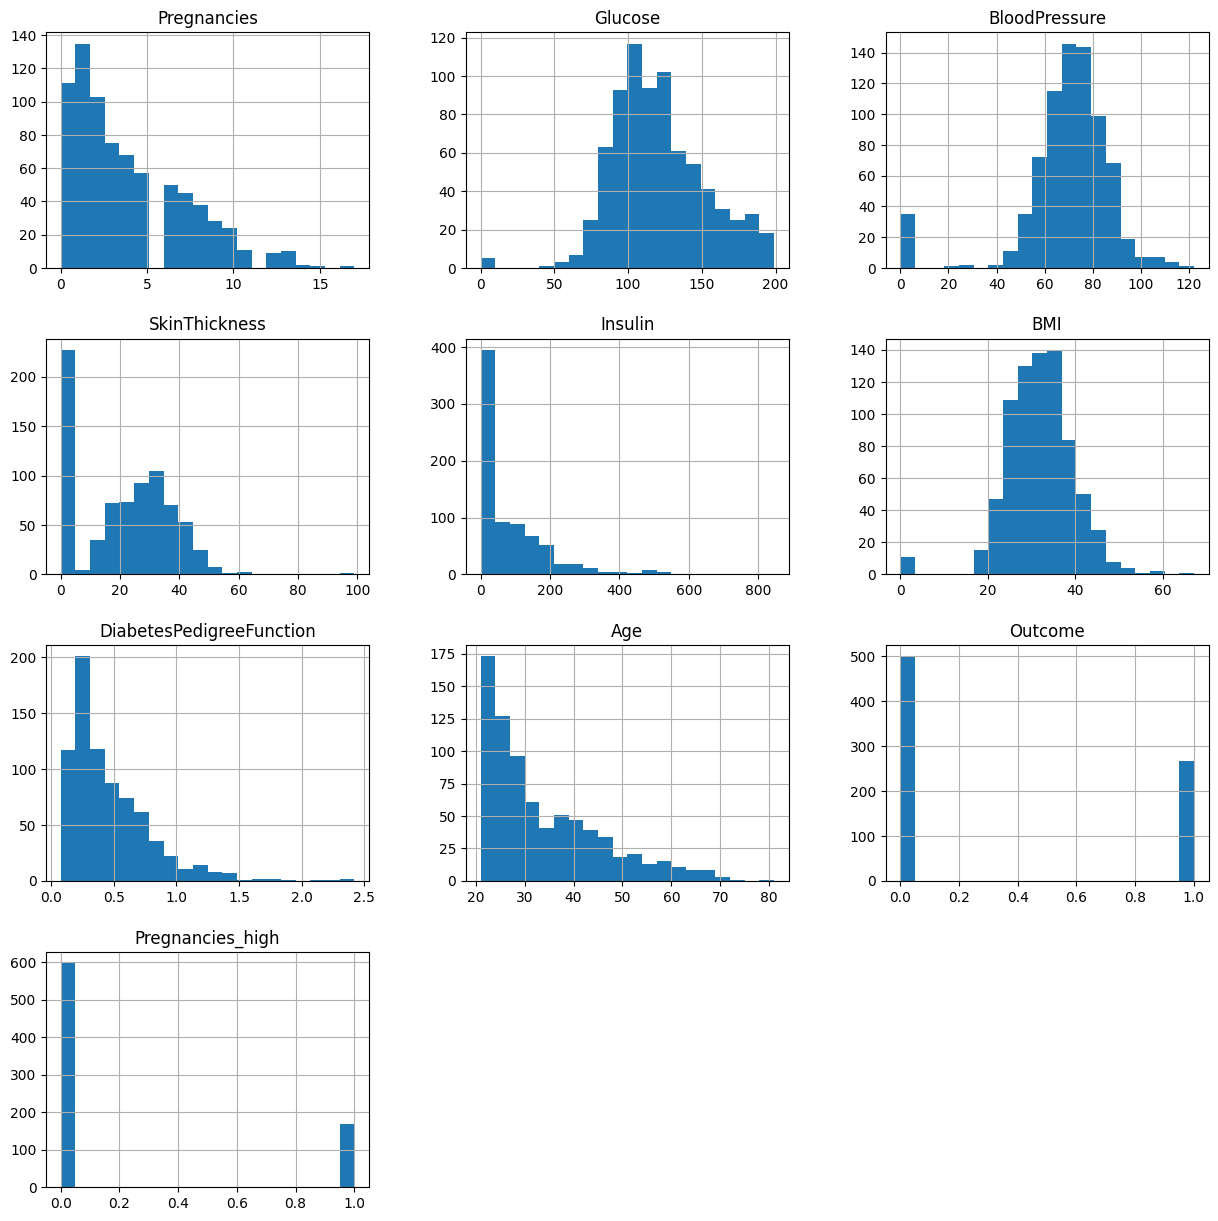

In [44]:
# pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려줍니다.
# histplot을 그릴 때는 수치형 데이터만 있어야 합니다. 그래서 boolean 값을 int형으로 바꿔줄 필요가 있습니다.

df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15, 15), bins=20)

In [53]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

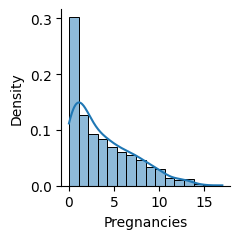

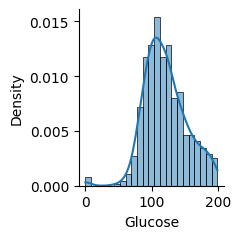

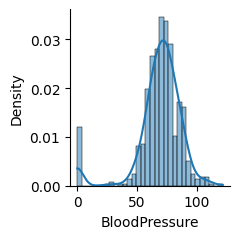

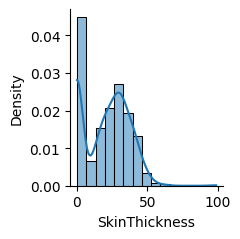

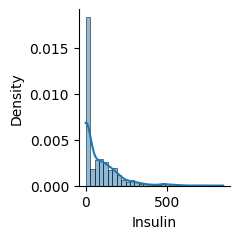

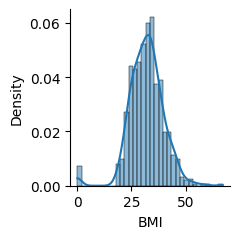

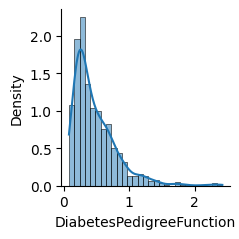

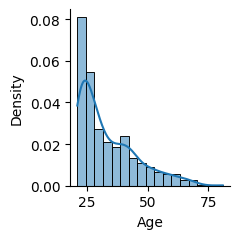

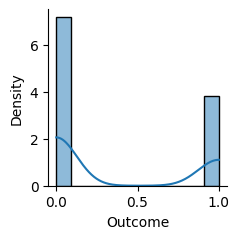

In [79]:
g = sns.displot(data=df, x=cols[0], kde=True, stat="density", height=2.5)

for col_name in cols[1:]:
    g.map(sns.displot, data=df, x=col_name, kde=True, stat="density", height=2.5)

### lmplot

상관계수가 높은 두 변수에 대해 시각화 합니다.

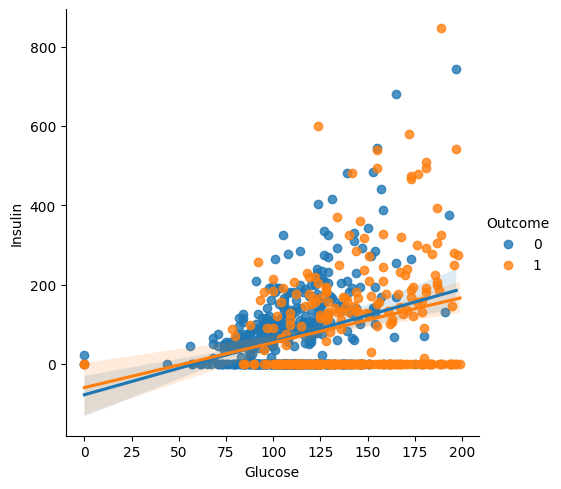

In [81]:
# Glucose 와 Insulin 을 Outcome 으로 구분해 봅니다.

sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

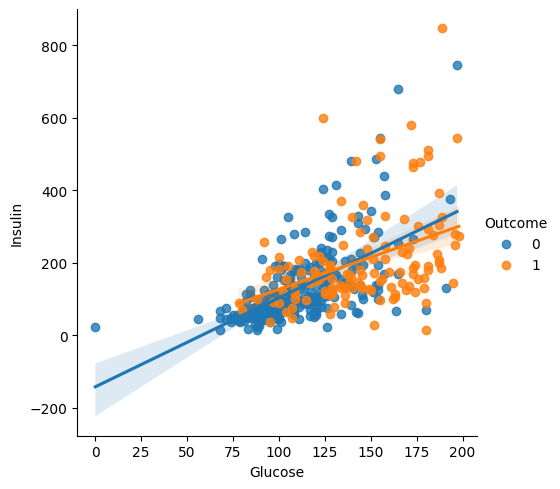

In [82]:
# Insulin 수치가 0 이상인 데이터로만 그려봅니다.

sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome")

### pairplot

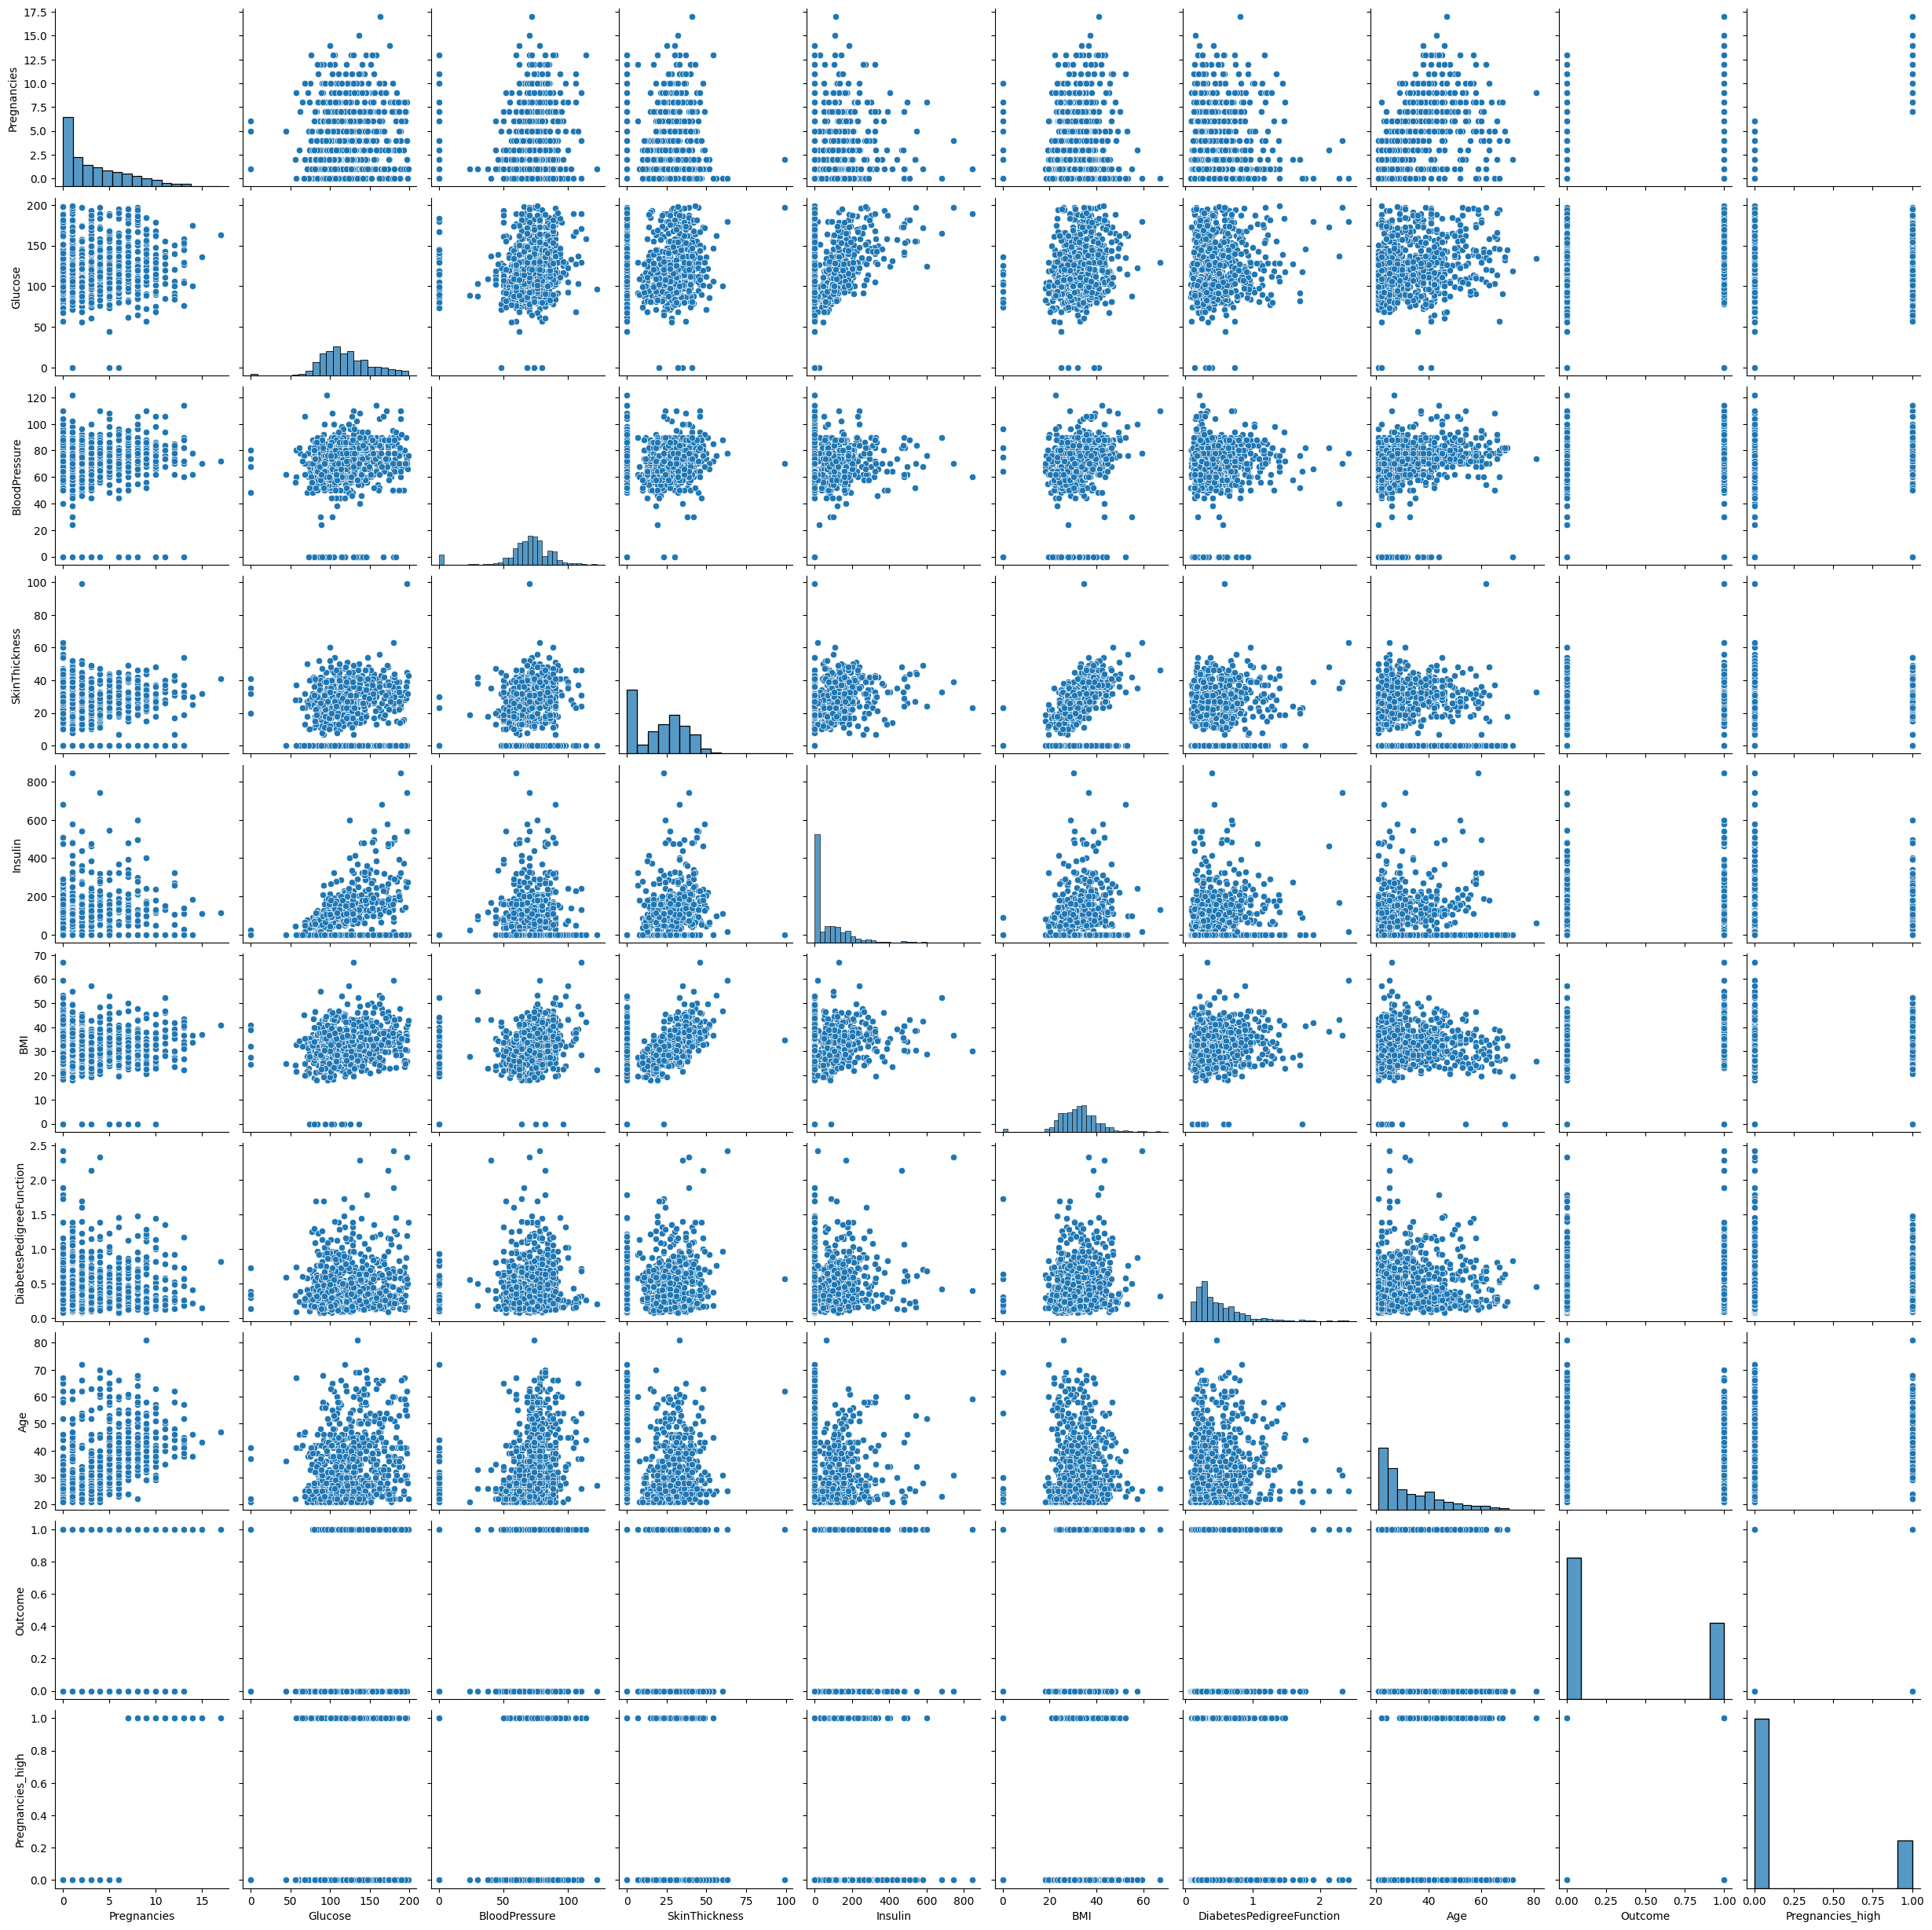

In [83]:
sns.pairplot(df)

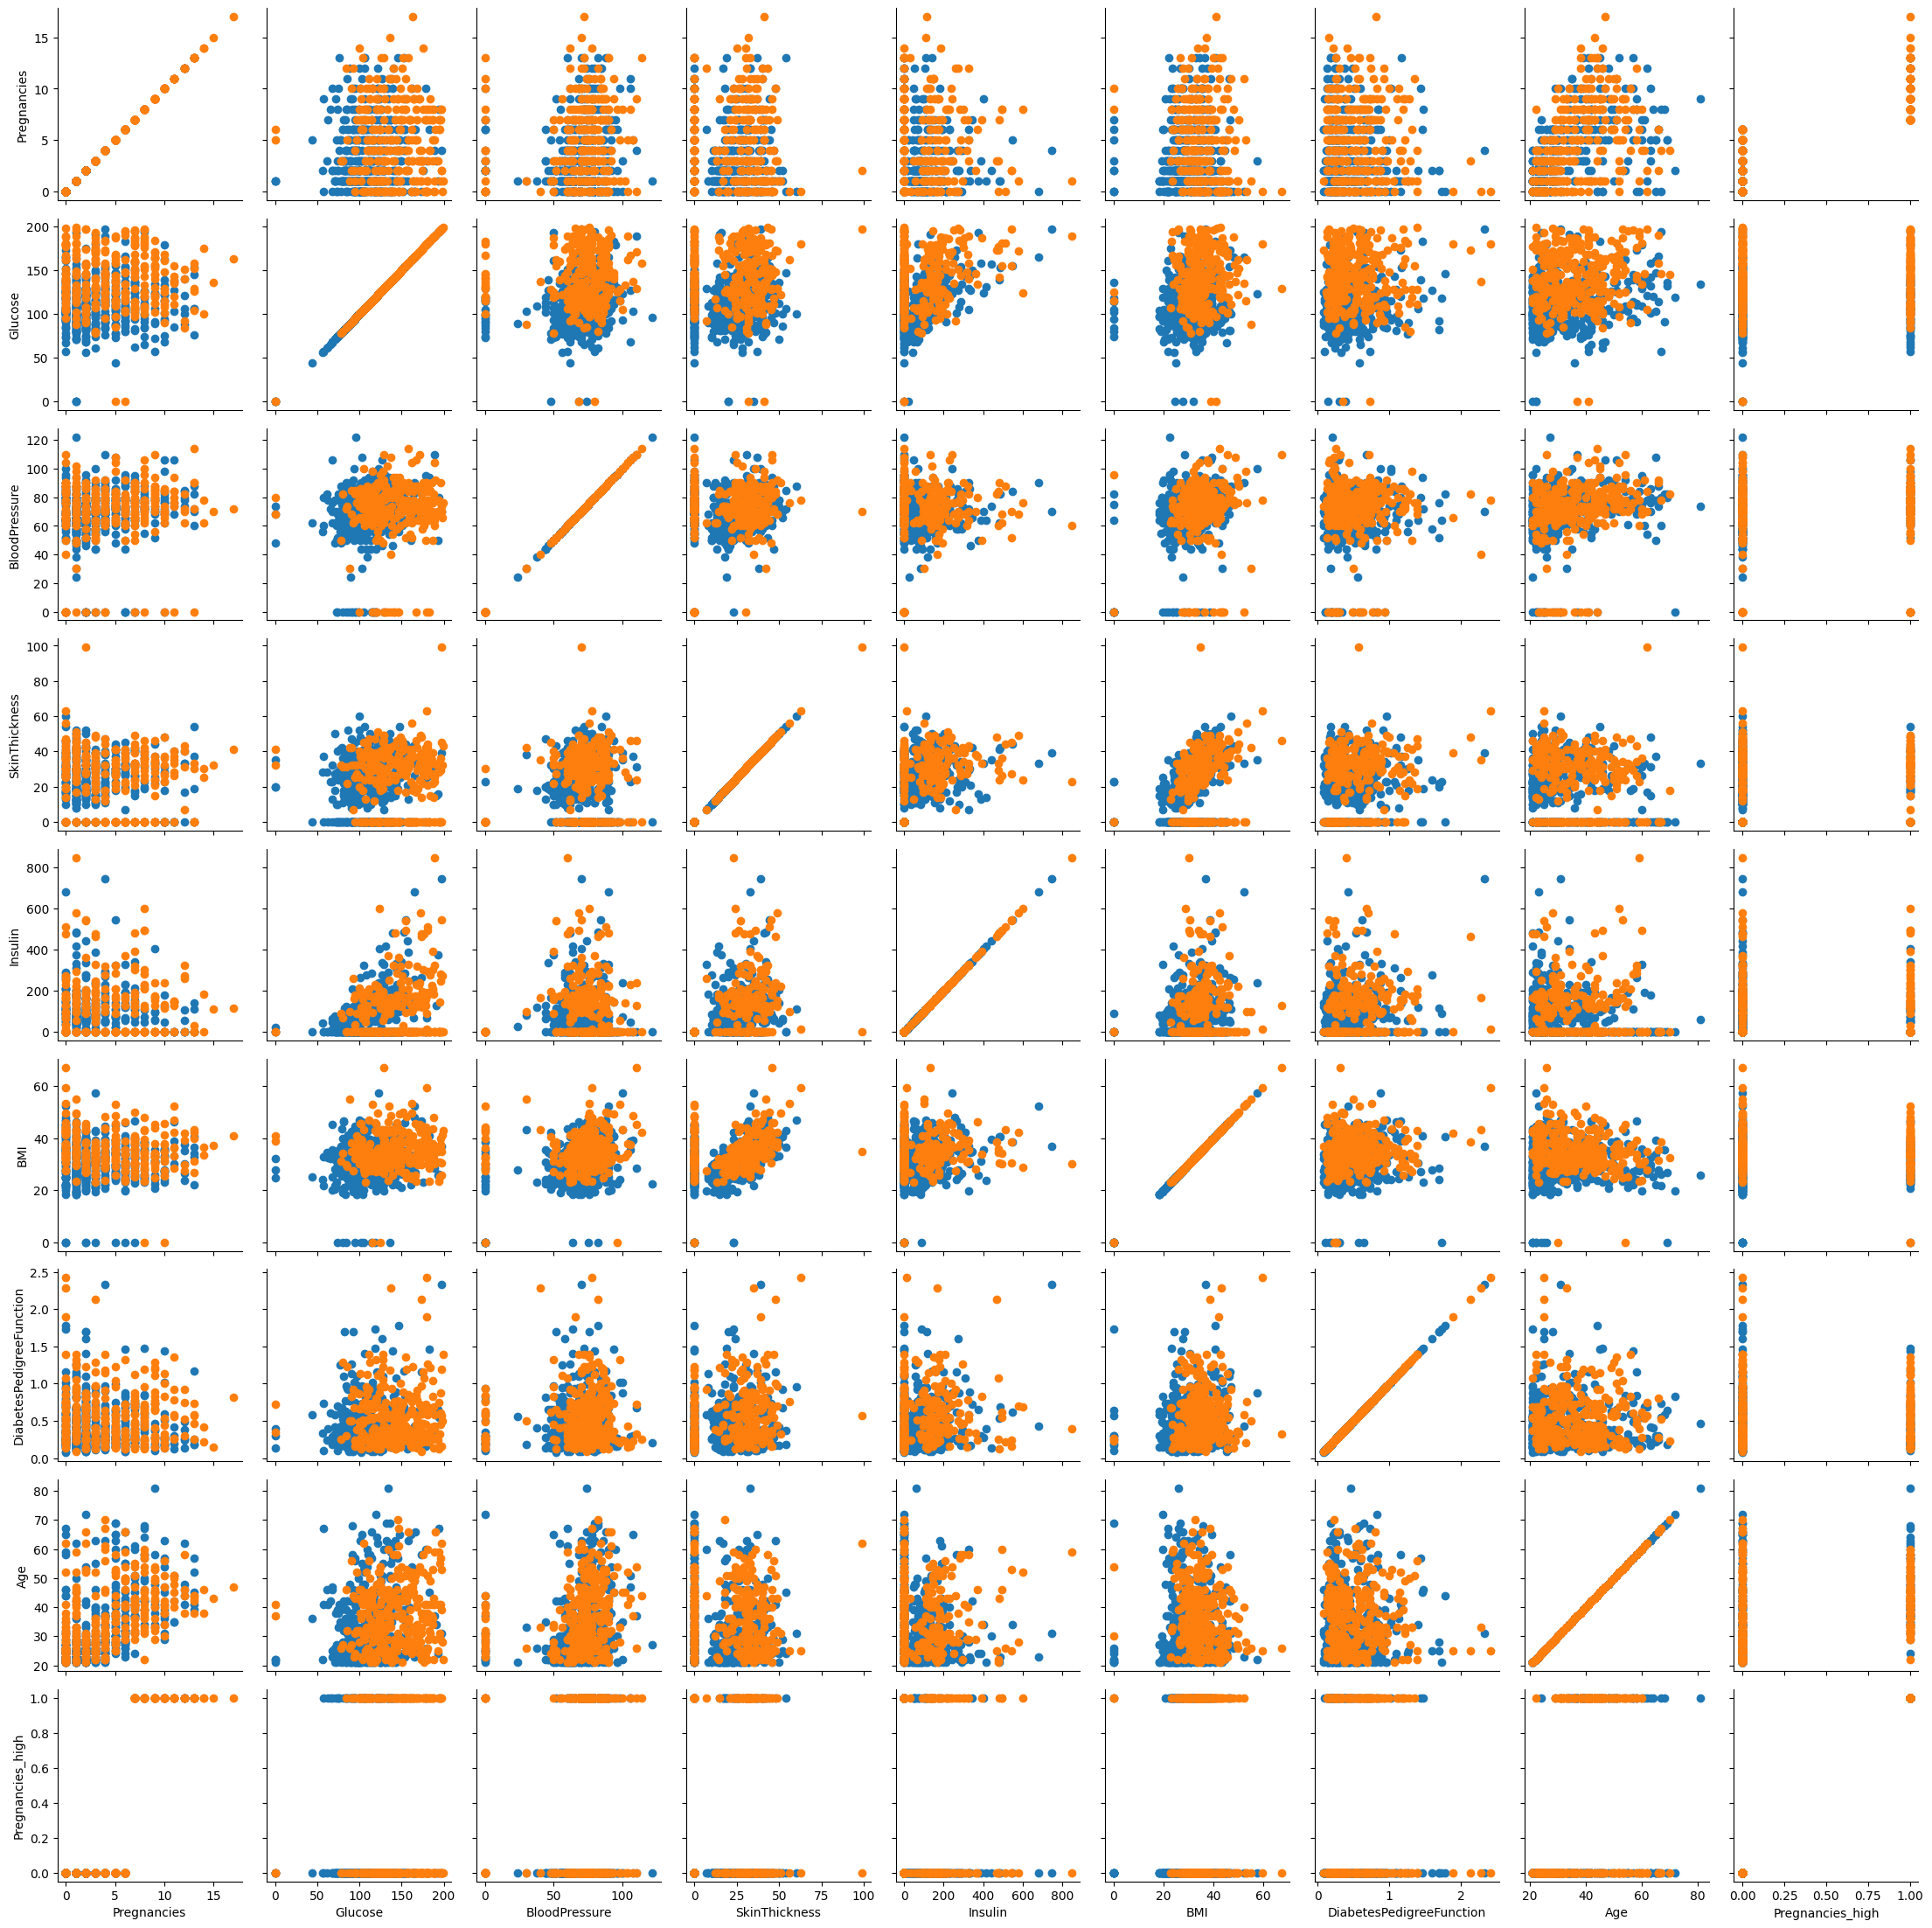

In [84]:
# PairGrid 를 통해 모든 변수에 대해 Outcome 에 따른 scatterplot을 그려봅니다.

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

## 상관 분석

In [86]:
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<Axes: >

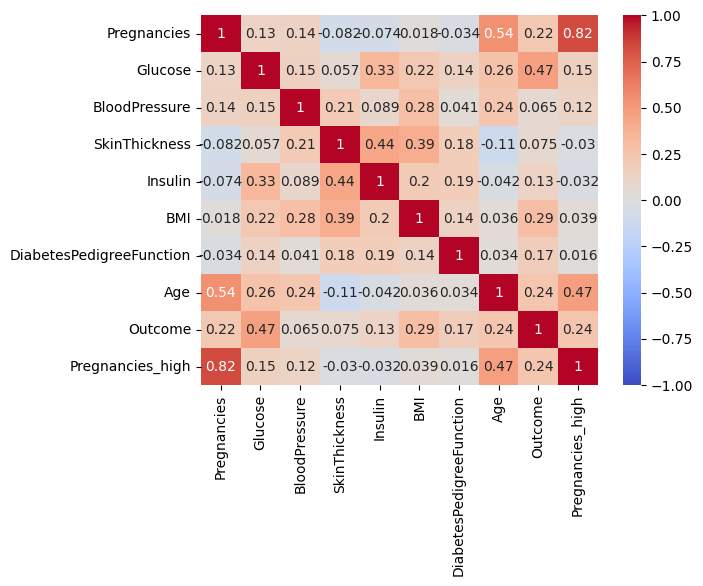

In [90]:
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [92]:
# 정답 값인 Outcome을 제외 하고 feature 로 사용할 컬럼들에 대해 0을 결측치로 만들어 줍니다.
# 상관계수를 구합니다.
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [93]:
df_corr = df_matrix.corr()

<Axes: >

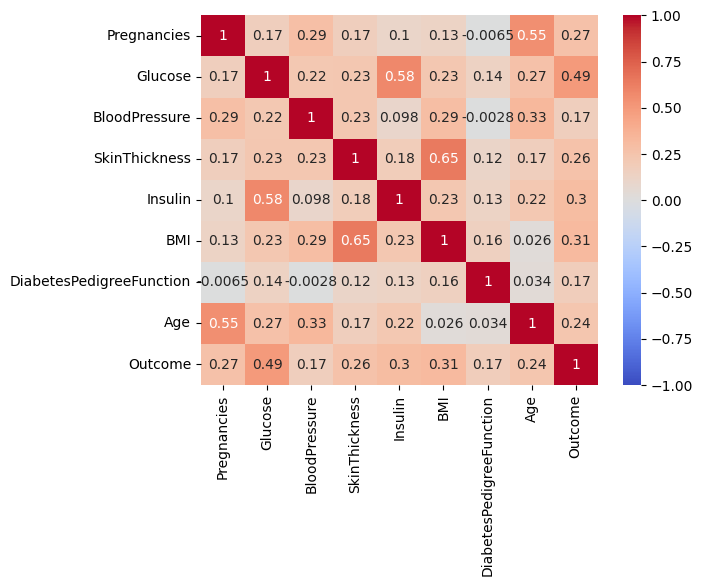

In [94]:
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [95]:
df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### 상관계수가 높은 변수끼리 보기

<Axes: xlabel='Insulin', ylabel='Glucose'>

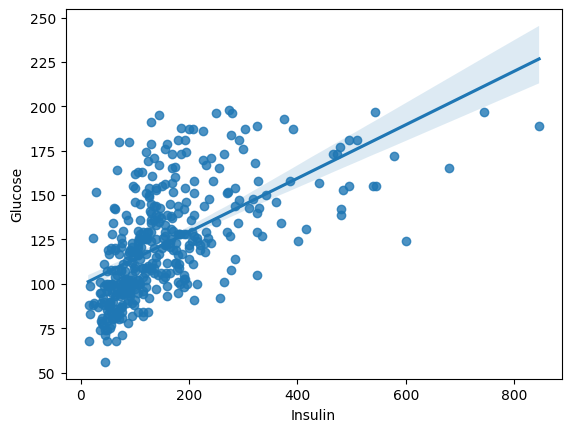

In [98]:
# Insulin 과 Glucose 로 regplot 그리기

sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

<Axes: xlabel='Insulin', ylabel='Glucose'>

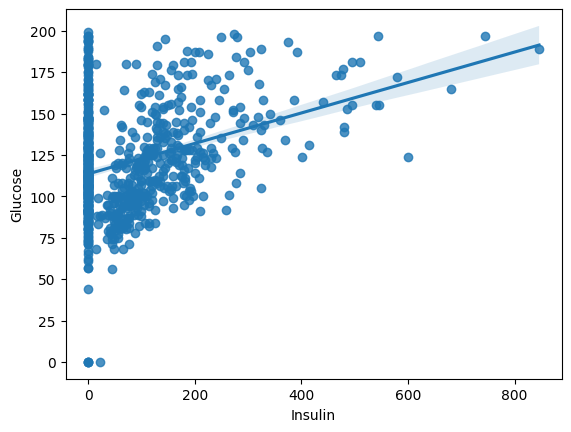

In [99]:
sns.regplot(data=df, x="Insulin", y="Glucose")

<Axes: xlabel='Age', ylabel='Pregnancies'>

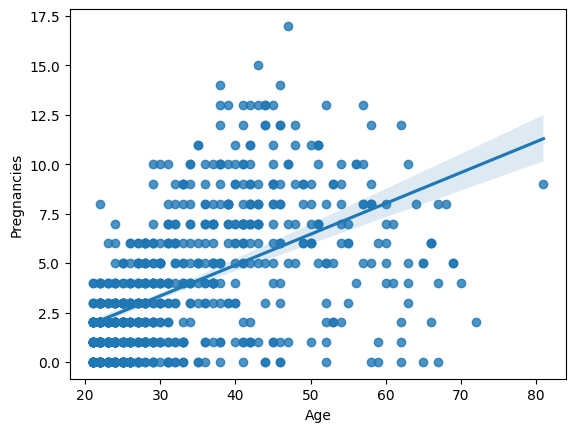

In [100]:
# Age 와 Pregnancies 로 regplot 그리기

sns.regplot(data=df, x="Age", y="Pregnancies")

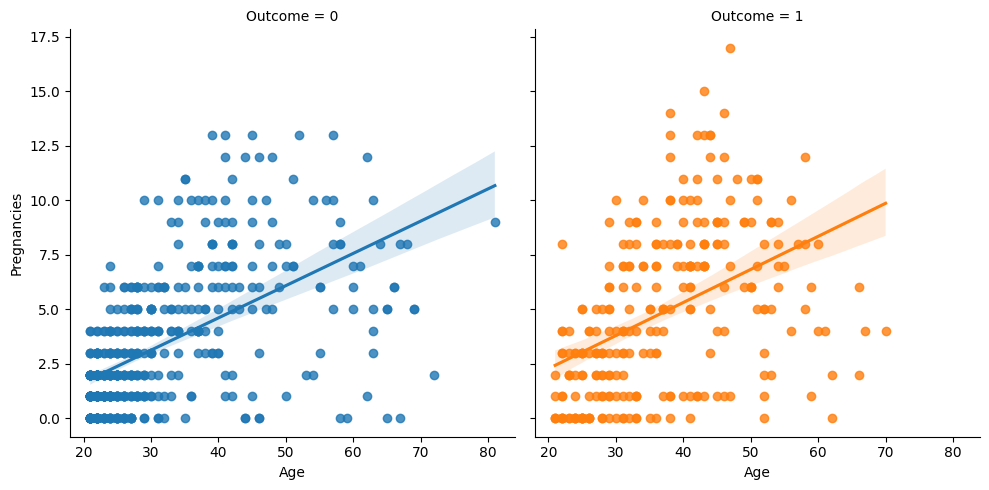

In [103]:
# Age 와 Pregnancies 로 lmplot 을 그리고 Outcome 에 따라 다른 색상으로 표현하기

sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")